<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_9_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We begin unsupervised estimators.

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful for


*   visualization
*   noise filtering
*   feature extraction and engineering



In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Motivation

High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. Richard Bellman described this phenomenon in 1961 as the *Curse of Dimensionality* where 

$$
\def\q{\unicode{x201C}}
\def\Q{\unicode{x201D}}
\q Many \,\,  algorithms \,\, that \,\, work \,\,  fine \,\, in \,\, low \,\, dimensions \,\, become \,\, intractable \,\, when \,\, the \,\, input \,\, is \,\, high-dimensional.\Q
$$

The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.

What can we do?
* eliminate noise features;
* choose uncorrelated features (so that each or them carries maximum independent information). In other words we want diagonal correlation matrix;
* eliminate features that carry little information (little variation).

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/pca.png) 


![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/cor.png) 


Suppose $A$ is a matrix with data that we have centralized beforehand.
It means we need to take average of each feature among all samples and substract from respective feature reads in samples. It's also a good idea to perform normalization:

$$
\text{Normalization = Centralization + Division by respective sample std}.
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/centr.png) 


Idea: find unit direction $\boldsymbol{x}$ so that

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]
$$

is maximum. It means we are looking for a direction so that if we project data onto it we will get maximum variation along that axis.

$$
\begin{aligned}
& \text{argmax}_{\boldsymbol{\boldsymbol{x}}}{\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A]},\\
& \boldsymbol{x}^{\top}\boldsymbol{x}=1.
\end{aligned}
$$

We can rewrite

$$
\mathbb{V}\text{ar} [\boldsymbol{x}^{\top} A] = \boldsymbol{x}^{\top} S \boldsymbol{x},
$$

where $S=A\, A^{\top}$ is an $n \times n$ **sample covariance matrix**. By introducing Lagrange multiplier $\lambda$ we get

$$
\text{argmax}_{\boldsymbol{\boldsymbol{x}}} \, \boldsymbol{x}^{\top} S \boldsymbol{x}+\lambda (\boldsymbol{x}^{\top}\boldsymbol{x}-1)
$$

By differentiating and setting derivative to $0$ we get

$$
S \, \boldsymbol{x}=\lambda \, \boldsymbol{x}.
$$

This is an eigenvalue problem that has $n$ solutions.
$S$ is symmetric so $\boldsymbol{x}$'s orthonormal.
If we pack $\boldsymbol{x}$'s into an orthogonal matrix $U$ we get

$$
S=U \Lambda \, U^{\top},
$$

where $\Lambda=\text{diag}(\lambda_1, \dots, \lambda_n)$ and $U^{\top}=U^{-1}$.

Initial variation of data is now distributed among directions we've found. In fact the largest eigenvalue - the largest fraction of variation is contained in the direction. 

$$
\def\id{{\Large\unicode{x1D7D9}}}
\mathbb{V}\text{ar}[\text{data}]=\text{tr}\, S=\text{tr} \, (U \Lambda U^{\top})=\text{tr} \, (\Lambda \, \underbrace{U^{\top}U}_{\color{grey}{\id}})=\text{tr}\, \Lambda=\sum_i \lambda_i.
$$

Physics analogy: normal modes.

New data with updated features
$$
A'=U^{\top} A.
$$

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

def perform_pca(X):
  pca.fit(X)
  return pca

In [0]:
#@title 2D PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

def draw_vector(v0, v, ax):
  v1 = v0 + v
  for idx in [0, 1]:
    if v1[idx] < -1:
      v1 = v0 - (1 + v0[idx])/v[idx] * v
    if v1[idx] > 1:
      v1 = v0 + (1 - v0[idx])/v[idx] * v
  
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot_pca(X, pca):
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c='b')
  for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, v, ax)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  model = perform_pca(X)
  fig = plot_pca(X, model)

  image_base64 = figure_to_base64(fig)
  return IPython.display.JSON({'image': image_base64})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.3)';
      ctx.fill();
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });
        
        
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }
  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add Feature
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move Feature
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete Feature
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do PCA
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s
  
display(IPython.display.HTML(generate_html()))
    
    
output.register_callback('notebook.InvSVM', invoke)

#Linear algebra essentials

**Eigenvectors and eigenvalues**

An eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it.

$$
A \, \boldsymbol{x}=\lambda \, \boldsymbol{x}
$$

where scalar $\lambda$ is called the **eigenvalue**.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/eigen.png) 

The set of all eigenvalues and eigenvectors is called **eigensystem**

$$
\{{\boldsymbol{x}_i, \lambda_i}\}
$$

Eigenvectors are not always orthogonal but for symmetric matrices they are!

**Orthogonal  matrices**


$$
U^{\top}=U^{-1}
$$

The analog of symmetric matrices in complex space are Unitary matrices.
Orthgonal matrices: rotations, reflections, basis orthonormal vectors storage.
It means for every orthonormal basis $\{\boldsymbol{e}_1,\boldsymbol{e}_2,\boldsymbol{e}_3 \}$

$$
U=\begin{pmatrix} | & | & | \\ \boldsymbol{e}_1 & \boldsymbol{e}_2 & \boldsymbol{e}_3 \\ | & | & | \end{pmatrix} 
$$

is orthonormal.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/ortho.png) 

**Symmetric matrices**

$$
A^{\top}=A
$$

Every matrix $B$ can generate symmetric matrices via

$$
B \rightarrow B^{\top} B
$$

or

$$
B \rightarrow B \, B^{\top} 
$$


The analog of symmetric matrices in complex space are Hermitian matrices.

Used to store coefficient quadratic forms $\boldsymbol{x}^{\top} A \boldsymbol{x}$. In statistics covariance matrix $\Sigma$ and sample covariance matrix $S$ are examples of symmetric matrices. 
In physics: Hermitian matrices are analogs of observable (physical quantaties).
In statistics and ML: covariance matrix is symmetric.

Eigenvectors of symmetric matrices that correspond to different eigenvalues are othogonal. In fact we can switch to orthonormal basis consisting of eigenvectors
this is Eigendecomposition of a symmetric matrix.

Decompositions:
* $\color{grey}{\text{LU decomposition}}$
* $\color{grey}{\text{Cholesky decomposition}}$
* $\color{grey}{\text{QR decomposition}}$
* $\color{grey}{\text{Polar decomposition}}$
* $\text{Eigendecomposition(spectral) / Власний розклад матриці}$
* $\color{grey}{\text{Jordan decomposition}}$
* $\text{Singular value decomposition / Сингулярний розклад матриці}$
* $\color{grey}{etc}$







##Eigendecomposition of a symmetric matrix / Власний розклад симетричної матриці

Suppose $A$ is $n\times n$ symmetric matrix then it's possible to switch to the orthonormal basis that consists of eigenvectors of $A$. In this basis $A$ will be diagonal matrix consisting of the eigenvalues of $A$.

$$
\begin{aligned}
A &= U \Lambda U^{\top} \\
\Lambda &= \text{diag}\{\lambda_1, \dots, \lambda_n\}
\end{aligned}
$$

where

$$
U=\begin{pmatrix} | & | & |\\
 \boldsymbol{x}_1 & \cdots & \boldsymbol{x}_n \\
 | & | & | \end{pmatrix} \\
$$

where $U$ is orthonormal matrix composed from the independent unit norm eigenvectors $\{\boldsymbol{x}_i\}$ of $A$:

$$
A \boldsymbol{x}_i
=\lambda_i \boldsymbol{x}_i.
$$

Eigenvalue(spectral) decomposition is useful for many thing particularly

* Matrix powers and matrix functions

$$
A^n=U \Lambda^n U^{\top}
$$

and 

$$
f(A)=U f(\Lambda) U^{\top}.
$$

* Determinant

$$
\det (A) =\prod_i{\lambda_i}.
$$


* Trace

$$
\text{trace} (A)=\sum_i{\lambda_i}.
$$

* Positive-definiteness

Matrix $A$ is positive-definite iff $\lambda_i > 0$.

##$\text{SVD}$ decomposition / Сингулярний розклад матриці

Suppose $A$ is $m\times n$ matrix

$$
A=U \, \Sigma \, V^{\top}
$$

where 
* $U$ is $m \times m $ orthonormal matrix;
* $V$ is $n \times n $ orthonormal matrix;
* $\Lambda$ is $m\times n$ diagonal matrix.

The diagonal entries $\sigma_i$ of $\Sigma$ are known as the **singular values** of $A$. A common convention is to list the singular values in descending order.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/bitmap.png) 

Here is geometrical intepretation of SVD:

$$
A=\text{Rotation} \cdot \text{Scale} \cdot \text{Rotation}.
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/svd.png) 

**Upper left**: The unit disc with the two canonical unit vectors.

**Upper right**: Unit disc transformed with $A$ and singular values $\sigma_1$ and $\sigma_2$ indicated.

**Lower left**: The action of $V^{\top}$ on the unit disc. This is just a rotation.

**Lower right**: The action of $\Sigma V^{\top}$ on the unit disc. $\Sigma$ scales in vertically and horizontally.


SVD is extremely useful. 

Suppose

$$
\begin{aligned}
A &=U \, \Sigma \, V^{\top} \\
\Sigma &= \text{diag}\{\sigma_1,\sigma_2, \cdots, \sigma_r, 0, \cdots, 0\}
\end{aligned}
$$

then

* Pseudoinverse

$$
\begin{aligned}
A^+ &=V \, \Sigma^+ \, U^{\top} \\
\Sigma^+ &= \text{diag}\left\{\frac{1}{\sigma_1},\frac{1}{\sigma_2}, \cdots, \frac{1}{\sigma_r}, 0, \cdots, 0\right\}
\end{aligned}
$$

The pseudoinverse is one way to solve linear least squares problems.

* Rank

$$
\text{Rank}=\text{# of non-zero singular values}
$$

* Eckart–Young theorem (Low-rank matrix approximation)

Some practical applications need to solve the problem of approximating a matrix $A$ with another truncated matrix $\tilde{A}$, which has a specific rank $l$. It turns out that the solution is given by the SVD of $A$, namely

$$
\tilde{A}=U\, {\tilde{\Sigma}} \, V^{\top}
$$

where ${\tilde{\Sigma}}$ is the same matrix as $\Sigma$ except that it contains only the $l$ largest singular values (the other singular values are replaced by zero). 

##How to find $SVD$ analytically

$$
A =U\, \Sigma \, V^{\top}.
$$

I've mentioned before that $A^{\top}A$ and $A A^{\top}$ are useful, right?

$$
\def\id{{\Large\unicode{x1D7D9}}}
A^{\top}A=V\, \Sigma^{\top}\, \underbrace{U^{\top} \, U}_{\color{grey}{\id}} \, \Sigma \, V^{\top}=V\, \Sigma^{\top} \Sigma \, V^{\top}, \\
A \, A^{\top}=U\, \Sigma\, \underbrace{V^{\top} \, V}_{\color{grey}{\id}} \, \Sigma^{\top} \, U^{\top}=U\, \Sigma \, \Sigma^{\top} \, U^{\top}.
$$

$A^{\top}A$ and $A A^{\top}$ are symmetric so we can perform spectral decompositions on them to find $\Lambda_1=\Sigma^{\top} \Sigma$ and $V$ as well as well as $\Lambda_2=\Sigma \, \Sigma^{\top}$ and $U$.
When we know $\Sigma^{\top} \Sigma$ and we know that $\Sigma$ it's diagonal with dimensions $m \times n$ it's atually easy to find it.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_9/svd_1.png) 


### Example

Let

$$
A =\begin{pmatrix} 
 1 & 1 \\
 1 & 0 \\
 0 & 1 \end{pmatrix}.
 $$

Then

$$
\begin{aligned}
A^{\top} A &=\begin{pmatrix} 2 & 1 \\
 1 & 2 \end{pmatrix}, \\
 A \, A^{\top} &=
\begin{pmatrix}
 2 & 1 & 1 \\
 1 & 1 & 0 \\
 1 & 0 & 1 \\
\end{pmatrix}.
\end{aligned}
$$

Perform eigendecomposition of symmetric matrices $A^{\top} A$ and $A \, A^{\top}$.

$$
\begin{aligned}
V &=
\begin{pmatrix} 
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} 
\end{pmatrix}, \\
U &=
\begin{pmatrix}
 \sqrt{\frac{2}{3}} & 0 & -\frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
\end{pmatrix}.
\end{aligned}
$$

Also

$$
\begin{aligned}
\Lambda_1  &= \Sigma^{\top} \Sigma =\begin{pmatrix} 
 3 & 0 \\
 0 & 1 
\end{pmatrix},\\
\Lambda_2  &= \Sigma \, \Sigma^{\top} =
\begin{pmatrix}
 3 & 0 & 0 \\
 0 & 1 & 0 \\
 0 & 0 & 0 \\
\end{pmatrix}.
\end{aligned}
$$

So

$$
\Sigma =
\begin{pmatrix}
 \color{red}{\cdot} & 0  \\
 0 & \color{red}{\cdot}  \\
 0 & 0  \\
\end{pmatrix}
=
\begin{pmatrix}
 \sqrt{3} & 0  \\
 0 & 1  \\
 0 & 0  \\
\end{pmatrix}.
$$

and

$$
A=U \, \Sigma \, V^{\top}=
\begin{pmatrix}
 \sqrt{\frac{2}{3}} & 0 & -\frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
 \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\
\end{pmatrix}
\begin{pmatrix}
 \sqrt{3} & 0  \\
 0 & 1  \\
 0 & 0  \\
\end{pmatrix}
\begin{pmatrix} 
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} 
\end{pmatrix}^{\top}.
$$


#Introducing Principal Component Analysis

1. **Normalize the data**
PCA is used to identify the components with the maximum variance, and the contribution of each variable to a component is based on its magnitude of variance. It is best practice to normalize the data before conducting a PCA as unscaled data with different measurement units can distort the relative comparison of variance across features.
2. **Create a covariance matrix for Eigen decomposition**
A useful way to get all the possible relationship between all the different dimensions is to calculate the covariance among them all and put them in a covariance matrix which represents these relationships in the data. Understanding the cumulative percentage of variance captured by each principal component is an integral part of reducing the feature set.
3. **Select the optimal number of principal components**
The optimal number of principal components is determined by looking at the cumulative explained variance ratio as a function of the number of components. The choice of PCs is entirely dependent on the tradeoff between dimensionality reduction and information loss. The graphical representation of the cumulative variance below shows that nearly 75% of the variance can be attributed to just 100/784 features and 95% to 300/784 indicating high feature redundancy.

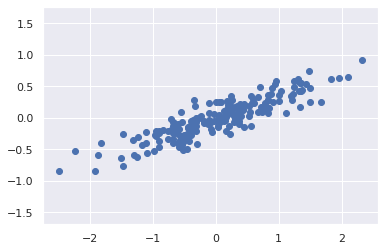

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [0]:
# istead of pedicting, PCA learns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


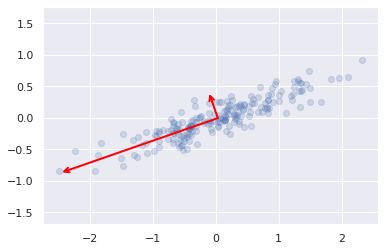

In [0]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
  ax.annotate('', v1, v0, arrowprops=arrowprops)
  
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
#vectors represent the principal axes of the data

##PCA as dimensionality reduction

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


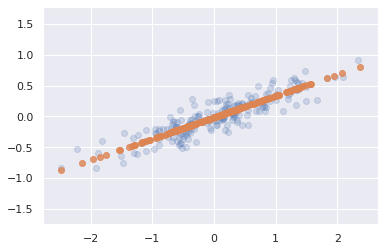

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
# old + projected data

##PCA for visualization: Handwritten digits

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [0]:
from sklearn.decomposition import PCA
# images 8x8 = 64 dimensions, reduce to 2

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


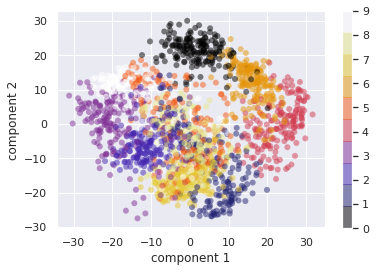

In [0]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [0]:
pca = PCA(3) # project from 64 to 3 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [0]:
#from sklearn.manifold import Isomap
#model = Isomap(n_components=3)
#projected = model.fit_transform(digits.data)
#print(digits.data.shape)
#print(projected.shape)
#print(digits.target.shape)

(1797, 64)
(1797, 3)
(1797,)


In [0]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

R, G, B = projected[:, 0], projected[:, 1], projected[:, 2]
cmap = {0: 'rgba(0,0,255,255)', 1: 'rgba(0,255,0,255)', 2: 'rgba(255,0,0,255)',
        3: 'rgba(0,0,128,255)', 4: 'rgba(0,128,0,255)', 5: 'rgba(128,0,255)',
        6: 'rgba(0,0,64,255)', 7: 'rgba(0,64,0,255)', 8: 'rgba(64,0,0,255)',
        9: 'rgba(0,0,0,255)'}
colors = [cmap[d] for d in digits.target]

fig = make_subplots(rows=1, cols=1, specs=[[{"type": "scene"}]])

fig.add_trace(go.Scatter3d(x=R, y=G, z=B, mode='markers', 
                           marker=dict(size=4, color=colors)),
              row=1, col=1)

fig.update_layout(width=600, height=600, autosize=False, 
                  title_text="3-component PCA for MNIST",
                  scene={"xaxis": {"title": "component 1"},
                         "yaxis": {"title": "component 2"},
                         "zaxis": {"title": "component 3"}},
                  showlegend=False)
      
fig.show()

##Choosing the number of components

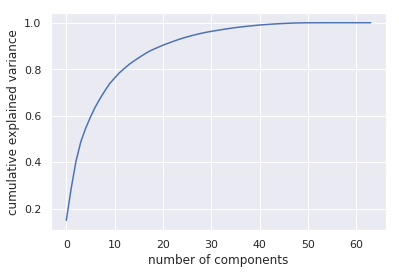

In [0]:
# the cumulative explained variance ratio as a function of the number of components

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we’d need about 20 components to retain 90% of the variance

#PCA as Noise Filtering

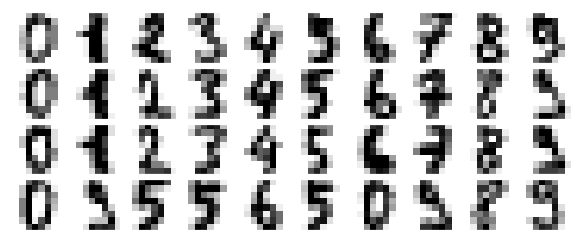

In [0]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

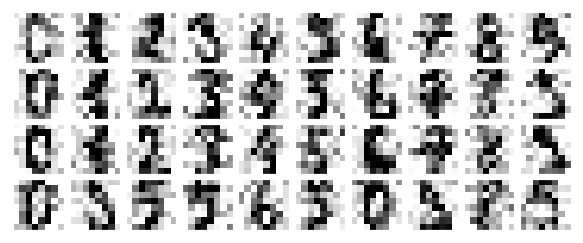

In [0]:
# add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [0]:
# let's retain 50% of variation

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

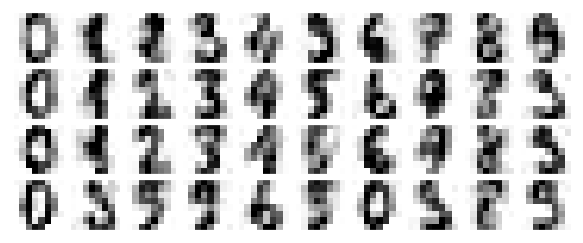

In [0]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#Example: Eigenfaces

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized') # big dataset, use randomized solver
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

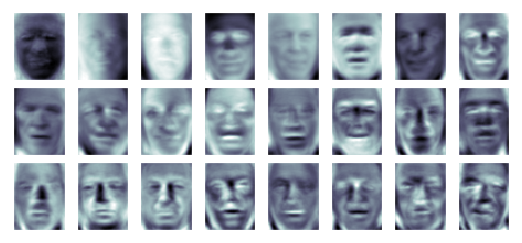

In [0]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

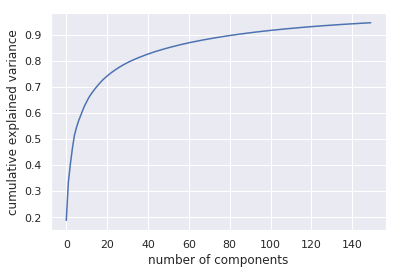

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

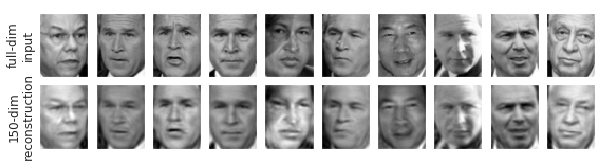

In [0]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
  
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data

#Principal Component Analysis Summary

PCA’s main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

**PCA assumptions**
* **Sample size:** Minimum of 150 observations and ideally a 5:1 ratio of observation to features (Pallant, 2010)
* **Correlations:** The feature set is correlated, so the reduced feature set effectively represents the original data space.
* **Linearity:** All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features.
* **Outliers:** No significant outliers in the data as these can have a disproportionate influence on the results.
* **Large variance implies more structure:** high variance axes are treated as principal components, while low variance axes are treated as noise and discarded.

**PCA Limitations**
* **Model performance:** PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.
* **Classification accuracy:** Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.
* **Outliers:** PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.
* **Interpretability:** Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.

**When should I use PCA?**
* Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
* Do you want to ensure your variables are independent of one another?
* Are you comfortable making your independent variables less interpretable?

Yes to this questions means you may want to use PCA